In [2]:
import pandas as pd
import os

In [3]:
ROOT_DIR = '/Users/filippopellizzari/code/ticket-routing/'
os.chdir(ROOT_DIR)

In [4]:
df = pd.read_parquet("data/interim/complaints_labeled.parquet")

In [5]:
df.shape

(67742, 20)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

In [7]:
labels = df['label']

In [9]:
from sklearn.decomposition import TruncatedSVD

# Assuming 'tfidf_matrix' is your TF-IDF matrix
num_components = 2  # Choose the number of components you want to retain

pca = TruncatedSVD(n_components=num_components)
tfidf_matrix_reduced = pca.fit_transform(tfidf_matrix)

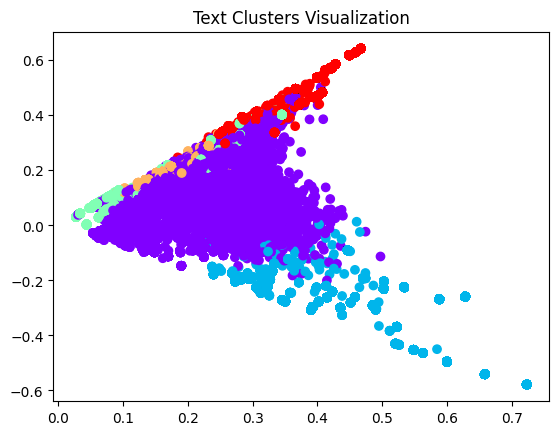

In [10]:
import matplotlib.pyplot as plt

x = tfidf_matrix_reduced[:, 0]
y = tfidf_matrix_reduced[:, 1]

plt.scatter(x, y, c=labels, cmap='rainbow')
plt.title('Text Clusters Visualization')
plt.show()